In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dft(x):

    ''' Calculates the Discrete Fourier Transform (DFT) of a signal '''

    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    return np.dot(e, x)

def idft(X):

    ''' Calculates the Inverse Discrete Fourier Transform (IDFT) of a signal '''
    
    X = np.asarray(X, dtype=complex)
    N = X.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    
    return np.dot(e, X)/N

def plotdft(y_t, w_sample = 100):
    
    ''' Calculate and plot the DFT and IDFT of a signal '''

    X_dft = dft(np.append(y_t[0], np.zeros(0)))

    N = y_t[0].shape[0]
    n = np.arange(N)
    T = N/w_sample
    freq = n/T

    n_oneside = N//2
    X_oneside =X_dft[:n_oneside]/n_oneside
    f_oneside = freq[:n_oneside]

    

    X_oneside = X_dft[:n_oneside] / n_oneside
    
        
        
    plt.figure(figsize=(12, 8))
    '''Plot the signal'''
    plt.subplot(311)
    plt.plot(y_t[0], 'r')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.title('Signal')

    '''Plot DFT'''
    plt.subplot(323)
    plt.stem(f_oneside, np.abs(X_oneside), 'b', markerfmt=" ", basefmt="-b")
    plt.xlim(0, 24)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|X(freq)|')   
    plt.title('DFT')

    '''Plot IDFT'''
    plt.subplot(324)
    plt.plot( idft(X_dft), 'r' )
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.title('IDFT')

    plt.suptitle('Discrete Fourier Transform (DFT) \n' + y_t[1])

    plt.tight_layout()
    plt.show()

    return

def create_signal():

    ''' Creates a 1 second random sinusoidal signal with a sum of
    3 frequencies and 3 amplitudes
     with a sample rate of 100 samples per second'''

    f1 = np.random.randint(1, 20)
    f2 = np.random.randint(1, 20)
    f3 = np.random.randint(1, 20)

    a1 = np.random.randint(1, 5)
    a2 = np.random.randint(1, 5)
    a3 = np.random.randint(1, 5)

    t = np.linspace(0, 1, 100)

    x = (a1*np.sin(2 * np.pi * f1*t) 
       + a2*np.sin(2 * np.pi *f2*t) 
       + a3*np.sin(2 * np.pi * f3*t) )

    eq = f"${a1}\\sin(2  \\pi  {f1} t) + {a2}\\sin(2  \\pi {f2}t) + {a3}\\sin(2  \\pi  {f3}t)$ "
    return x , eq

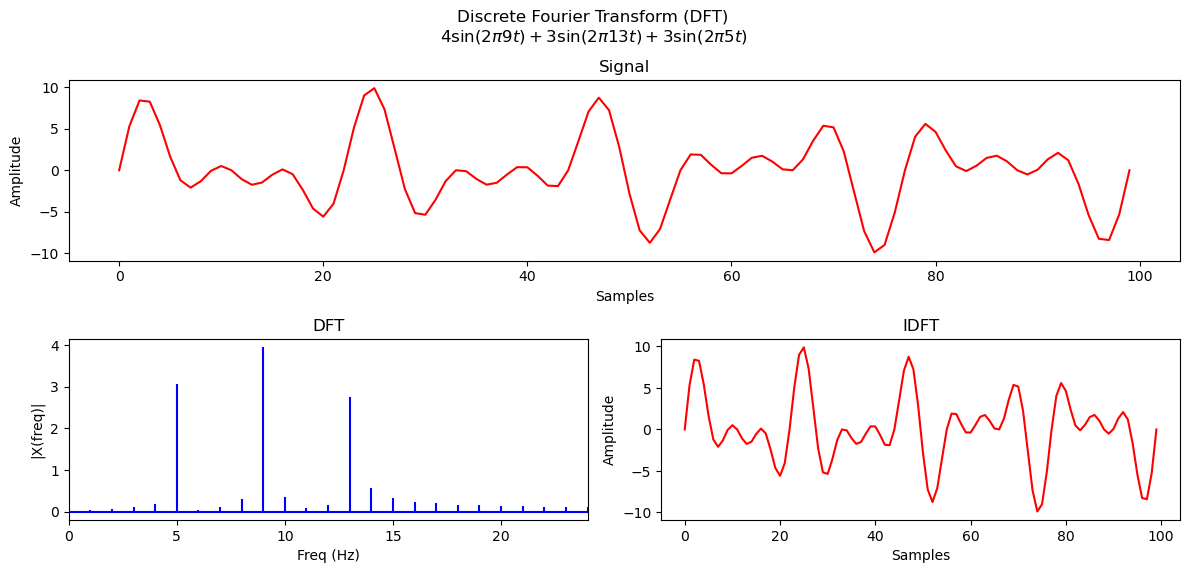

In [38]:
plotdft(create_signal())